## Conducting Conjoint analysis to understand consumer preferences and how they make trade-offs between different product attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_excel('conjoint icecream.xlsx', sheet_name='data')
df

,Profile,Flavor,Packaging,Light,Organic,Individual1,Individual2,Individual3,Individual4,Individual5,Individual6,Individual7,Individual8,Individual9,Individual10,Individual11,Individual12,Individual13,Individual14,Individual15
0,Profile1,Strawberry,Waffle,No_low_fat,Not_organic,1,6,9,1,10,7,7,9,1,10,1,10,7,10,2
1,Profile2,Vanilla,Pint,Low_fat,Not_organic,4,7,5,2,6,4,4,6,6,8,2,8,9,1,7
2,Profile3,Strawberry,Cone,Low_fat,Organic,2,3,4,3,2,5,3,1,5,4,3,6,4,3,6
3,Profile4,Raspberry,Waffle,Low_fat,Organic,7,5,7,4,7,1,10,8,7,6,5,2,2,7,10
4,Profile5,Vanilla,Cone,No_low_fat,Organic,9,8,2,7,5,2,9,3,8,2,6,3,1,5,9
5,Profile6,Raspberry,Cone,No_low_fat,Not_organic,8,2,8,10,4,3,6,7,9,3,10,1,3,4,4
6,Profile7,Mango,Pint,No_low_fat,Organic,3,1,3,6,3,6,2,5,2,1,4,7,5,6,5
7,Profile8,Chocolate,Pint,No_low_fat,Not_organic,10,9,6,5,1,9,5,2,10,9,8,9,8,9,3
8,Profile9,Mango,Cone,Low_fat,Not_organic,6,4,10,9,9,8,8,10,3,5,7,5,6,8,1
9,Profile10,Chocolate,Waffle,No_low_fat,Organic,5,10,1,8,8,10,1,4,4,7,9,4,10,2,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile       10 non-null     object
 1   Flavor        10 non-null     object
 2   Packaging     10 non-null     object
 3   Light         10 non-null     object
 4   Organic       10 non-null     object
 5   Individual1   10 non-null     int64 
 6   Individual2   10 non-null     int64 
 7   Individual3   10 non-null     int64 
 8   Individual4   10 non-null     int64 
 9   Individual5   10 non-null     int64 
 10  Individual6   10 non-null     int64 
 11  Individual7   10 non-null     int64 
 12  Individual8   10 non-null     int64 
 13  Individual9   10 non-null     int64 
 14  Individual10  10 non-null     int64 
 15  Individual11  10 non-null     int64 
 16  Individual12  10 non-null     int64 
 17  Individual13  10 non-null     int64 
 18  Individual14  10 non-null     int64 
 19  Individual1

In [4]:
df = df.melt(id_vars=['Profile', 'Flavor', 'Packaging', 'Light', 'Organic',], var_name='resp', value_name='Value')
df['Value'] = 11-df['Value']
dfobs = df.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Profile    150 non-null    object
 1   Flavor     150 non-null    object
 2   Packaging  150 non-null    object
 3   Light      150 non-null    object
 4   Organic    150 non-null    object
 5   resp       150 non-null    object
 6   Value      150 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 8.3+ KB


In [5]:
df.head(20)

,Profile,Flavor,Packaging,Light,Organic,resp,Value
0,Profile1,Strawberry,Waffle,No_low_fat,Not_organic,Individual1,10
1,Profile2,Vanilla,Pint,Low_fat,Not_organic,Individual1,7
2,Profile3,Strawberry,Cone,Low_fat,Organic,Individual1,9
3,Profile4,Raspberry,Waffle,Low_fat,Organic,Individual1,4
4,Profile5,Vanilla,Cone,No_low_fat,Organic,Individual1,2
5,Profile6,Raspberry,Cone,No_low_fat,Not_organic,Individual1,3
6,Profile7,Mango,Pint,No_low_fat,Organic,Individual1,8
7,Profile8,Chocolate,Pint,No_low_fat,Not_organic,Individual1,1
8,Profile9,Mango,Cone,Low_fat,Not_organic,Individual1,5
9,Profile10,Chocolate,Waffle,No_low_fat,Organic,Individual1,6


Flavor
Chocolate     4.533333
Raspberry     5.333333
Mango         5.733333
Vanilla       5.733333
Strawberry    6.166667
Name: Value, dtype: float64


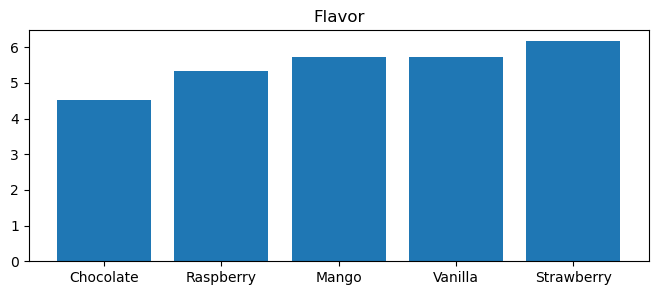

Packaging
Waffle    5.000000
Pint      5.644444
Cone      5.766667
Name: Value, dtype: float64


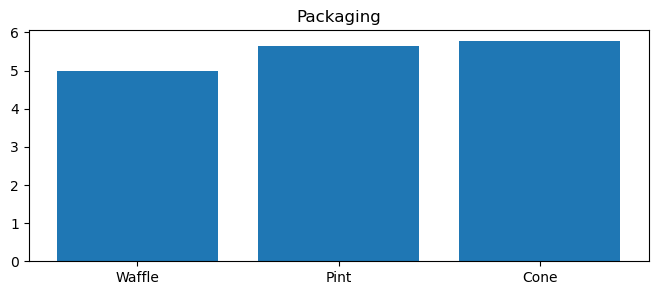

Light
No_low_fat    5.388889
Low_fat       5.666667
Name: Value, dtype: float64


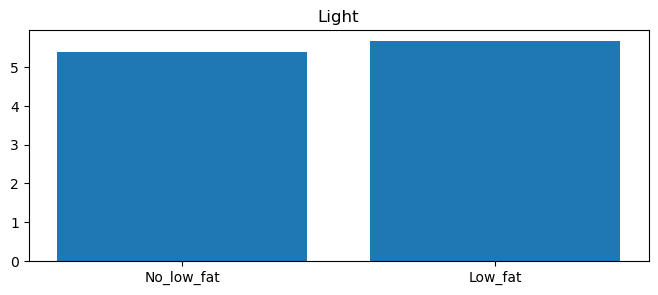

Organic
Not_organic    4.946667
Organic        6.053333
Name: Value, dtype: float64


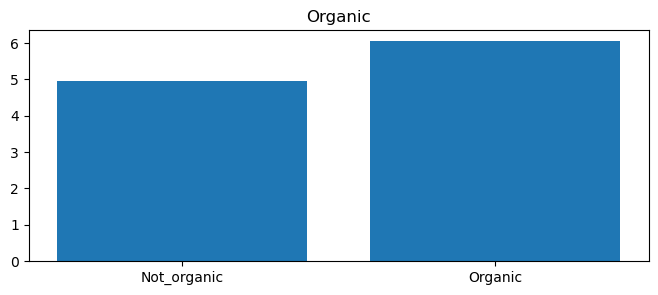

In [6]:
cols = ['Flavor', 'Packaging', 'Light', 'Organic']
for col in cols:
    df3 = df.groupby(col)['Value'].agg('mean').sort_values()
    print(df3)
    plt.figure(figsize=(8,3))
    plt.title(col)
    plt.bar(x=df3.index, height=df3.values)
    plt.show()

In [7]:
df2 = pd.get_dummies(df,drop_first=True).astype('int')

In [8]:
df2

,Value,Profile_Profile10,Profile_Profile2,Profile_Profile3,Profile_Profile4,Profile_Profile5,Profile_Profile6,Profile_Profile7,Profile_Profile8,Profile_Profile9,...,resp_Individual14,resp_Individual15,resp_Individual2,resp_Individual3,resp_Individual4,resp_Individual5,resp_Individual6,resp_Individual7,resp_Individual8,resp_Individual9
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,7,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
146,6,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
147,8,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
148,10,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [9]:
df2.columns

Index(['Value', 'Profile_Profile10', 'Profile_Profile2', 'Profile_Profile3',
       'Profile_Profile4', 'Profile_Profile5', 'Profile_Profile6',
       'Profile_Profile7', 'Profile_Profile8', 'Profile_Profile9',
       'Flavor_Mango', 'Flavor_Raspberry', 'Flavor_Strawberry',
       'Flavor_Vanilla', 'Packaging_Pint', 'Packaging_Waffle',
       'Light_No_low_fat', 'Organic_Organic', 'resp_Individual10',
       'resp_Individual11', 'resp_Individual12', 'resp_Individual13',
       'resp_Individual14', 'resp_Individual15', 'resp_Individual2',
       'resp_Individual3', 'resp_Individual4', 'resp_Individual5',
       'resp_Individual6', 'resp_Individual7', 'resp_Individual8',
       'resp_Individual9'],
      dtype='object')

In [10]:
import statsmodels.api as sm

y = df2['Value']
X = df2.drop(['Value', 'Profile_Profile10', 'Profile_Profile2', 'Profile_Profile3',
       'Profile_Profile4', 'Profile_Profile5', 'Profile_Profile6',
       'Profile_Profile7', 'Profile_Profile8', 'Profile_Profile9'], axis=1)
X['const'] = 1
lir = sm.OLS(y, X).fit()
lir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.6864
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.846
Time:                        20:22:11   Log-Likelihood:                -362.68
No. Observations:                 150   AIC:                             771.4
Df Residuals:                     127   BIC:                             840.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Flavor_Mango          0.8231      0.875      0.940      0.349      -0.909       2.555
Flavor_Raspberry      1.2769      0.875      1.459      0.147      -0.455       3.009
Flavor_Strawberry     2.1102      0.875      2.411      0.017       0.378       3.842
Flavor_Vanilla        0.8231      0.875      0.940      0.349      -0.909       2.555
Packaging_Pint        0.8037      0.672      1.196      0.234      -0.526       2.133
Packaging_Waffle     -0.9037      0.672     -1.345      0.181      -2.233       0.426
Light_No_low_fat      0.1500      0.539      0.278      0.781      -0.916       1.216
Organic_Organic       1.4481      0.508      2.851      0.005       0.443       2.453
resp_Individual10  7.772e-16      1.320   5.89e-16      1.000      -2.612       2.612
resp_Individual11  1.443e-15      1.320   1.09e-15      1.000      -2.612       2.612
resp_Individual12 -1.776e-15      1.320  -1.35e-15      1.000      -2.612       2.612
resp_Individual13  8.882e-16      1.320   6.73e-16      1.000      -2.612       2.612
resp_Individual14  6.661e-16      1.320   5.05e-16      1.000      -2.612       2.612
resp_Individual15  1.665e-16      1.320   1.26e-16      1.000      -2.612       2.612
resp_Individual2  -8.882e-16      1.320  -6.73e-16      1.000      -2.612       2.612
resp_Individual3   1.055e-15      1.320   7.99e-16      1.000      -2.612       2.612
resp_Individual4  -1.776e-15      1.320  -1.35e-15      1.000      -2.612       2.612
resp_Individual5   -1.11e-16      1.320  -8.41e-17      1.000      -2.612       2.612
resp_Individual6  -7.772e-16      1.320  -5.89e-16      1.000      -2.612       2.612
resp_Individual7    2.22e-16      1.320   1.68e-16      1.000      -2.612       2.612
resp_Individual8   -2.22e-16      1.320  -1.68e-16      1.000      -2.612       2.612
resp_Individual9  -6.384e-16      1.320  -4.84e-16      1.000      -2.612       2.612
const                 3.7093      1.322      2.805      0.006       1.093       6.326
==============================================================================
Omnibus:                       21.030   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.469
Skew:                           0.269   Prob(JB):                       0.0239
Kurtosis:                       2.049   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lp = lir.params
pars = pd.DataFrame({'var':lp.index, 'coeft':lp.values})
pars

,var,coeft
0,Flavor_Mango,8.231481e-01
1,Flavor_Raspberry,1.276852e+00
2,Flavor_Strawberry,2.110185e+00
3,Flavor_Vanilla,8.231481e-01
4,Packaging_Pint,8.037037e-01
5,Packaging_Waffle,-9.037037e-01
6,Light_No_low_fat,1.500000e-01
7,Organic_Organic,1.448148e+00
8,resp_Individual10,7.771561e-16
9,resp_Individual11,1.443290e-15


In [12]:
df.columns

Index(['Profile', 'Flavor', 'Packaging', 'Light', 'Organic', 'resp', 'Value'], dtype='object')

In [13]:
dfg = pd.get_dummies(df.loc[:, [ 'Flavor', 'Packaging', 'Light', 'Organic']], 
                     columns=['Flavor', 'Packaging', 'Light', 'Organic'])
cols = list(dfg.columns)

df3 = pd.DataFrame()
df3['var'] = cols
cols

['Flavor_Chocolate',
 'Flavor_Mango',
 'Flavor_Raspberry',
 'Flavor_Strawberry',
 'Flavor_Vanilla',
 'Packaging_Cone',
 'Packaging_Pint',
 'Packaging_Waffle',
 'Light_Low_fat',
 'Light_No_low_fat',
 'Organic_Not_organic',
 'Organic_Organic']

In [14]:
df3 = df3.merge(pars, on='var', how='left')
df3 = df3.fillna(0)
df3

,var,coeft
0,Flavor_Chocolate,0.000000
1,Flavor_Mango,0.823148
2,Flavor_Raspberry,1.276852
3,Flavor_Strawberry,2.110185
4,Flavor_Vanilla,0.823148
5,Packaging_Cone,0.000000
6,Packaging_Pint,0.803704
7,Packaging_Waffle,-0.903704
8,Light_Low_fat,0.000000
9,Light_No_low_fat,0.150000


In [15]:
df3['attrib'] = df3['var'].str.split('_', n=1, expand=True)[0]
df3['factors'] = df3['var'].str.split('_', n=1, expand=True)[1]
df3

,var,coeft,attrib,factors
0,Flavor_Chocolate,0.000000,Flavor,Chocolate
1,Flavor_Mango,0.823148,Flavor,Mango
2,Flavor_Raspberry,1.276852,Flavor,Raspberry
3,Flavor_Strawberry,2.110185,Flavor,Strawberry
4,Flavor_Vanilla,0.823148,Flavor,Vanilla
5,Packaging_Cone,0.000000,Packaging,Cone
6,Packaging_Pint,0.803704,Packaging,Pint
7,Packaging_Waffle,-0.903704,Packaging,Waffle
8,Light_Low_fat,0.000000,Light,Low_fat
9,Light_No_low_fat,0.150000,Light,No_low_fat


In [16]:
attrib = df3.groupby('attrib')['coeft'].agg(['min', 'max'])
attrib['imp'] = attrib['max'] - attrib['min'] #range
attrib['imp%'] = attrib['imp']*100/(attrib['imp'].sum()) 
attrib = attrib.sort_values(['imp%'],ascending=False)
attrib

,min,max,imp,imp%
attrib,,,,
Flavor,0.000000,2.110185,2.110185,38.963925
Packaging,-0.903704,0.803704,1.707407,31.526757
Organic,0.000000,1.448148,1.448148,26.739614
Light,0.000000,0.150000,0.150000,2.769704


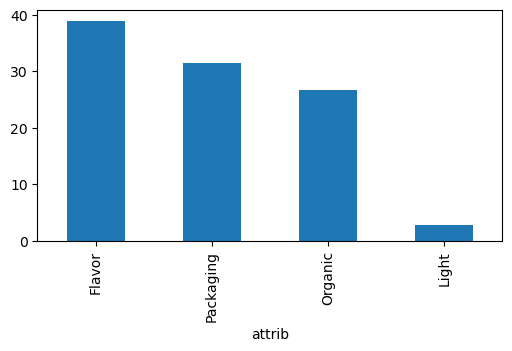

In [17]:
attrib['imp%'].plot.bar(figsize=(6,3))
plt.show()

In [18]:
list1 = ['Chocolate', 'Mango', 'Raspberry', 'Strawberry', 'Vanilla']
list2 = ['Cone', 'Pint', 'Waffle'] 
list3 = ['Low_fat', 'No_low_fat'] 
list4 = ['Not_organic', 'Organic'] 

factors = [[i, j, k, l] for i in list1
                 for j in list2 
                 for k in list3
                 for l in list4] 

In [19]:
df = pd.DataFrame(factors, columns=[ 'Flavor', 'Packaging', 'Light', 'Organic'])
df.head()

,Flavor,Packaging,Light,Organic
0,Chocolate,Cone,Low_fat,Not_organic
1,Chocolate,Cone,Low_fat,Organic
2,Chocolate,Cone,No_low_fat,Not_organic
3,Chocolate,Cone,No_low_fat,Organic
4,Chocolate,Pint,Low_fat,Not_organic


In [20]:
df3

,var,coeft,attrib,factors
0,Flavor_Chocolate,0.000000,Flavor,Chocolate
1,Flavor_Mango,0.823148,Flavor,Mango
2,Flavor_Raspberry,1.276852,Flavor,Raspberry
3,Flavor_Strawberry,2.110185,Flavor,Strawberry
4,Flavor_Vanilla,0.823148,Flavor,Vanilla
5,Packaging_Cone,0.000000,Packaging,Cone
6,Packaging_Pint,0.803704,Packaging,Pint
7,Packaging_Waffle,-0.903704,Packaging,Waffle
8,Light_Low_fat,0.000000,Light,Low_fat
9,Light_No_low_fat,0.150000,Light,No_low_fat


In [21]:
df4 = df3.loc[:, ['factors', 'coeft']]

for fs in ['Flavor', 'Packaging', 'Light', 'Organic']:
    df5 = df4.rename(columns = {'coeft': str('coef_'+fs),'factors':fs})
    df = df.merge(df5, on=fs)
    
df

,Flavor,Packaging,Light,Organic,coef_Flavor,coef_Packaging,coef_Light,coef_Organic
0,Chocolate,Cone,Low_fat,Not_organic,0.000000,0.000000,0.00,0.000000
1,Chocolate,Cone,Low_fat,Organic,0.000000,0.000000,0.00,1.448148
2,Chocolate,Cone,No_low_fat,Not_organic,0.000000,0.000000,0.15,0.000000
3,Chocolate,Cone,No_low_fat,Organic,0.000000,0.000000,0.15,1.448148
4,Chocolate,Pint,Low_fat,Not_organic,0.000000,0.803704,0.00,0.000000
5,Chocolate,Pint,Low_fat,Organic,0.000000,0.803704,0.00,1.448148
6,Chocolate,Pint,No_low_fat,Not_organic,0.000000,0.803704,0.15,0.000000
7,Chocolate,Pint,No_low_fat,Organic,0.000000,0.803704,0.15,1.448148
8,Chocolate,Waffle,Low_fat,Not_organic,0.000000,-0.903704,0.00,0.000000
9,Chocolate,Waffle,Low_fat,Organic,0.000000,-0.903704,0.00,1.448148


In [22]:
df['Tot_utils'] = df.loc[:,['coef_Flavor', 'coef_Packaging', 'coef_Light', 'coef_Organic']].sum(axis=1)
df['exp_tot_util'] = np.exp(0.8*df['Tot_utils'])
Tot_Exp_Util = df['exp_tot_util'].sum()
df['Mkt Share'] = df['exp_tot_util'] /Tot_Exp_Util

In [23]:
df = df.sort_values('Tot_utils', ascending=False)
df.head()

,Flavor,Packaging,Light,Organic,coef_Flavor,coef_Packaging,coef_Light,coef_Organic,Tot_utils,exp_tot_util,Mkt Share
43,Strawberry,Pint,No_low_fat,Organic,2.110185,0.803704,0.15,1.448148,4.512037,36.952364,0.093876
41,Strawberry,Pint,Low_fat,Organic,2.110185,0.803704,0.00,1.448148,4.362037,32.773807,0.083261
39,Strawberry,Cone,No_low_fat,Organic,2.110185,0.000000,0.15,1.448148,3.708333,19.427055,0.049354
31,Raspberry,Pint,No_low_fat,Organic,1.276852,0.803704,0.15,1.448148,3.678704,18.971976,0.048198
37,Strawberry,Cone,Low_fat,Organic,2.110185,0.000000,0.00,1.448148,3.558333,17.230252,0.043773


# Insights 

* The market share (Mkt Share) reflects the proportion of total demand for each product combination. For example, the Strawberry Pint with No Low Fat and 
Organic has a market share of 9.39%, indicating it holds a significant portion of the market.

* The conjoint analysis reveals consumer preferences for Strawberry flavor, Pint packaging, Organic certification, and No low-fat products.
* These insights can be used to refine product offerings, packaging decisions,and marketing strategies, focusing on high-utility 
attributes to maximize consumer appeal and market share.